In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [39]:
miles_df = pd.read_csv('Miles_Traveled.csv')
alcohol_df = pd.read_csv('Alcohol_Sales.csv')

In [41]:
miles_df.head(), alcohol_df.head()

(         DATE  TRFVOLUSM227NFWA
 0  1970-01-01           80173.0
 1  1970-02-01           77442.0
 2  1970-03-01           90223.0
 3  1970-04-01           89956.0
 4  1970-05-01           97972.0,
          DATE  S4248SM144NCEN
 0  1992-01-01            3459
 1  1992-02-01            3458
 2  1992-03-01            4002
 3  1992-04-01            4564
 4  1992-05-01            4221)

In [43]:
miles_df.shape, alcohol_df.shape

((588, 2), (325, 2))

In [45]:
miles_df.info(), alcohol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


(None, None)

In [49]:
miles_df.describe(), alcohol_df.describe()

(       TRFVOLUSM227NFWA
 count        588.000000
 mean      190420.380952
 std        57795.538934
 min        77442.000000
 25%       133579.000000
 50%       196797.500000
 75%       243211.500000
 max       288145.000000,
        S4248SM144NCEN
 count      325.000000
 mean      7886.400000
 std       2914.269061
 min       3031.000000
 25%       5231.000000
 50%       7481.000000
 75%       9977.000000
 max      15504.000000)

In [51]:
type(miles_df['DATE'][0]), type(alcohol_df['DATE'][0])

(str, str)

### Convert the DATE columns to datetime format

In [53]:
miles_df['DATE'] = pd.to_datetime(miles_df['DATE'])
alcohol_df['DATE'] = pd.to_datetime(alcohol_df['DATE'])

In [55]:
type(miles_df['DATE'][0]), type(alcohol_df['DATE'][0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

### Set the DATE columns as the index

In [58]:
miles_df.set_index('DATE', inplace=True)
alcohol_df.set_index('DATE', inplace=True)

### Align datasets based on the date range

In [61]:
combined_df = miles_df.join(alcohol_df, how='inner')

In [63]:
combined_df.head()

,TRFVOLUSM227NFWA,S4248SM144NCEN
DATE,,
1992-01-01,167652.0,3459
1992-02-01,160204.0,3458
1992-03-01,183778.0,4002
1992-04-01,186069.0,4564
1992-05-01,196725.0,4221


In [67]:
combined_df.shape

(324, 2)

### Plotting the time series data

In [70]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

### Plot Miles Traveled

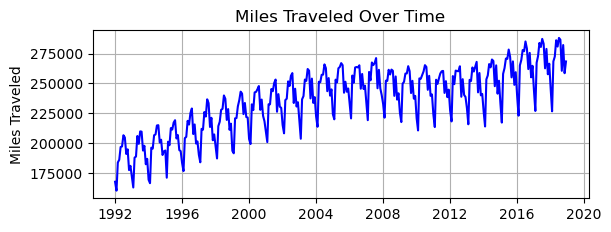

In [73]:
plt.subplot(2, 1, 1)
plt.plot(combined_df.index, combined_df['TRFVOLUSM227NFWA'], label='Miles Traveled', color='blue')
plt.title('Miles Traveled Over Time')
plt.ylabel('Miles Traveled')
plt.grid(True)

### Plot Alcohol Sales

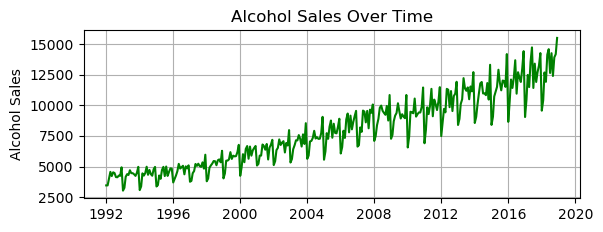

In [76]:
plt.subplot(2, 1, 2)
plt.plot(combined_df.index, combined_df['S4248SM144NCEN'], label='Alcohol Sales', color='green')
plt.title('Alcohol Sales Over Time')
plt.ylabel('Alcohol Sales')
plt.grid(True)

### Function to fit ARIMA model and forecast

In [81]:
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

### Split the data into training and testing sets

In [84]:
train_size = int(len(combined_df) * 0.8)
train, test = combined_df.iloc[:train_size], combined_df.iloc[train_size:]

In [88]:
train_size

259

In [94]:
train.shape, test.shape

((259, 2), (65, 2))

### Define ARIMA order for both series

In [97]:
miles_order = (5, 1, 0)
alcohol_order = (5, 1, 0)

### Fit ARIMA models

In [102]:
miles_model_fit = fit_arima(train['TRFVOLUSM227NFWA'], miles_order)
alcohol_model_fit = fit_arima(train['S4248SM144NCEN'], alcohol_order)

C:\Users\joshua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joshua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joshua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joshua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\joshua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be use

In [104]:
# Forecast
miles_forecast = miles_model_fit.forecast(steps=len(test))
alcohol_forecast = alcohol_model_fit.forecast(steps=len(test))

In [112]:
miles_forecast.info(), alcohol_forecast.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 65 entries, 2013-08-01 to 2018-12-01
Freq: MS
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 65 entries, 2013-08-01 to 2018-12-01
Freq: MS
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


(None, None)

### Calculate RMSE

In [115]:
miles_rmse = np.sqrt(mean_squared_error(test['TRFVOLUSM227NFWA'], miles_forecast))
alcohol_rmse = np.sqrt(mean_squared_error(test['S4248SM144NCEN'], alcohol_forecast))

print(f'Miles Traveled RMSE: {miles_rmse}')
print(f'Alcohol Sales RMSE: {alcohol_rmse}')

Miles Traveled RMSE: 19318.176378222364
Alcohol Sales RMSE: 1885.5557739343992


### Miles Traveled Forecast vs Actual

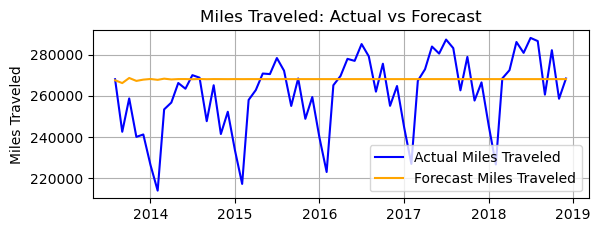

In [118]:
plt.subplot(2, 1, 1)
plt.plot(test.index, test['TRFVOLUSM227NFWA'], label='Actual Miles Traveled', color='blue')
plt.plot(test.index, miles_forecast, label='Forecast Miles Traveled', color='orange')
plt.title('Miles Traveled: Actual vs Forecast')
plt.ylabel('Miles Traveled')
plt.legend()
plt.grid(True)

### Alcohol Sales Forecast vs Actual

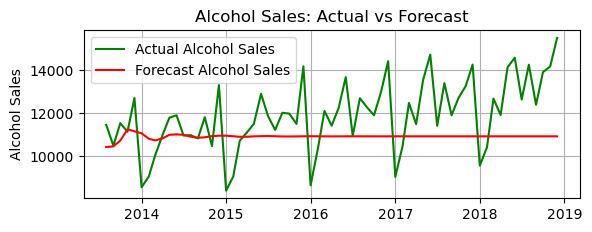

In [121]:
plt.subplot(2, 1, 2)
plt.plot(test.index, test['S4248SM144NCEN'], label='Actual Alcohol Sales', color='green')
plt.plot(test.index, alcohol_forecast, label='Forecast Alcohol Sales', color='red')
plt.title('Alcohol Sales: Actual vs Forecast')
plt.ylabel('Alcohol Sales')
plt.legend()
plt.grid(True)

In [127]:
import joblib

# Save the ARIMA models
joblib.dump(miles_model_fit, 'miles_model.pkl')
joblib.dump(alcohol_model_fit, 'alcohol_model.pkl')


['alcohol_model.pkl']